In [99]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

In [100]:
def plot_and_print_comparison(disparity_map_path, disparity_image_path, absolute_map_path, absolute_image_path, disparity_figure_title_suffix = '', absolute_figure_title_suffix = ''):
    
    avfoundation_disparity_inverted = npy.load(disparity_map_path)
    avfoundation_disparity_inverted_image = mpimg.imread(disparity_image_path)
    # Need to make sure image is in correct orientation
    avfoundation_disparity_inverted_image = ndimage.rotate(avfoundation_disparity_inverted_image, 270, reshape=True)
    
    print("Printing disparity inverted:")
    print(avfoundation_disparity_inverted)
    print(f"Min value: {avfoundation_disparity_inverted.min()}")
    print(f"Max value: {avfoundation_disparity_inverted.max()}")
    print("\n")
    
    arkit_absolutedepth = npy.load(absolute_map_path)
    arkit_absolutedepth_image = mpimg.imread(absolute_image_path)
    print("Printing absolute depth map:")
    print(arkit_absolutedepth)
    print(f"Min value: {arkit_absolutedepth.min()}")
    print(f"Max value: {arkit_absolutedepth.max()}")
    
    smallest_depth_value = min(avfoundation_disparity_inverted.min(), arkit_absolutedepth.min())
    largest_depth_value = max(avfoundation_disparity_inverted.max(), arkit_absolutedepth.max())
    
    # AVFoundation disparity inverted plot
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig1.suptitle(f'Color map: AVFoundation disparity inverse{disparity_figure_title_suffix}\nColor map range is from {smallest_depth_value} to {largest_depth_value}')

    ax1.set_title('Color map of depth')
    ax1.set_xlabel('Pixel column')
    ax1.set_ylabel('Pixel row')
    ax1img = ax1.imshow(avfoundation_disparity_inverted, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig1.colorbar(ax1img, ax = ax1)

    ax2.set_title('RGB image')
    ax2.set_xlabel('Pixel column')
    ax2.set_ylabel('Pixel row')
    ax2.imshow(avfoundation_disparity_inverted_image)

    fig1.tight_layout()
    
    # ARKit absolute depth plot
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2)
    fig2.suptitle(f'Color map: ARKit absolute depth{absolute_figure_title_suffix}')

    ax3.set_title('Color map of depth')
    ax3.set_xlabel('Pixel column')
    ax3.set_ylabel('Pixel row')
    ax3img = ax3.imshow(arkit_absolutedepth, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig2.colorbar(ax3img, ax=ax3)

    ax4.set_title('RGB image')
    ax4.set_xlabel('Pixel column')
    ax4.set_ylabel('Pixel row')
    ax4.imshow(arkit_absolutedepth_image)

    fig2.tight_layout()
    
    

Printing disparity inverted:
[[0.96603775 0.96603775 0.96603775 ... 0.9799043  0.97803247 0.97803247]
 [0.96694994 0.9678639  0.9678639  ... 0.98178333 0.9808429  0.98178333]
 [0.9678639  0.969697   0.9706161  ... 0.9836695  0.9827255  0.9836695 ]
 ...
 [1.0694517  1.0694517  1.0700104  ... 1.0778947  1.0801687  1.0813094 ]
 [1.0694517  1.0700104  1.0711297  ... 1.0773277  1.0784624  1.0784624 ]
 [1.0694517  1.0705698  1.0716902  ... 1.0767612  1.0767612  1.0767612 ]]
Min value: 0.9472710490226746
Max value: 1.0847457647323608


Printing absolute depth map:
[[0.9272461  0.9213867  0.921875   ... 0.9560547  0.9482422  0.96728516]
 [0.9160156  0.9433594  0.93652344 ... 0.9448242  0.96240234 0.9296875 ]
 [0.9238281  0.9199219  0.9272461  ... 0.94921875 0.94433594 0.93408203]
 ...
 [1.0214844  1.0351562  1.0332031  ... 1.0703125  1.0634766  1.0664062 ]
 [1.0400391  1.0576172  1.0351562  ... 1.0712891  1.0634766  1.0673828 ]
 [1.0244141  1.03125    1.0361328  ... 1.0703125  1.0800781  1.074

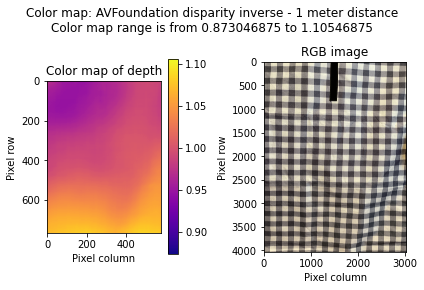

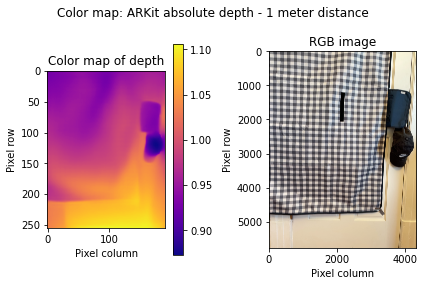

In [101]:
# Photo of flat wall 1 meter away
plot_and_print_comparison(
    'Photo1-1meterDistance/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo1-1meterDistance/AVFoundationDisparityInverted/photo.jpeg',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/photo.jpeg',
    ' - 1 meter distance',
    ' - 1 meter distance'
)

Printing disparity inverted:
[[0.79012346 0.78890604 0.78951424 ... 0.77752465 0.77752465 0.77752465]
 [0.79012346 0.78951424 0.79012346 ... 0.77752465 0.77752465 0.77752465]
 [0.79012346 0.79012346 0.79012346 ... 0.77752465 0.77752465 0.77752465]
 ...
 [0.8366013  0.8366013  0.8366013  ... 0.7944143  0.7950311  0.7956488 ]
 [0.8366013  0.8366013  0.8366013  ... 0.79379845 0.79379845 0.79379845]
 [0.8366013  0.8366013  0.8366013  ... 0.79318357 0.79256964 0.79318357]]
Min value: 0.7763457298278809
Max value: 0.8366013169288635


Printing absolute depth map:
[[2.0664062 2.0742188 2.0742188 ... 1.9160156 1.8984375 1.9023438]
 [2.0878906 2.1113281 2.0976562 ... 1.8974609 1.9189453 1.8701172]
 [2.0722656 2.0722656 2.0878906 ... 1.9013672 1.9023438 1.8642578]
 ...
 [1.1816406 1.1953125 1.1933594 ... 1.1005859 1.0917969 1.1015625]
 [1.1884766 1.2099609 1.1884766 ... 1.0898438 1.09375   1.09375  ]
 [1.1748047 1.1787109 1.1865234 ... 1.0849609 1.0908203 1.0839844]]
Min value: 1.083984375
Max v

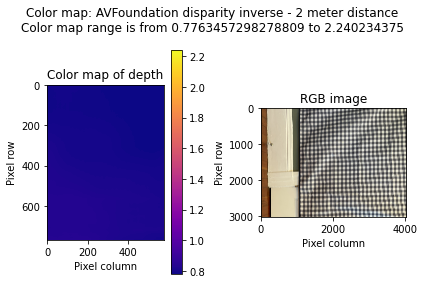

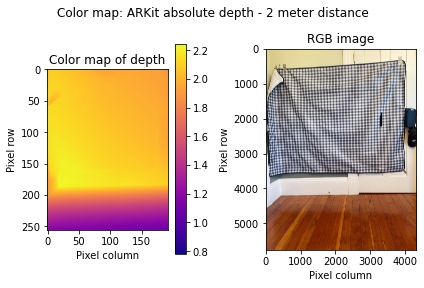

In [102]:
# Photo of flat wall 2 meters away
plot_and_print_comparison(
    'Photo2-2meterDistance/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo2-2meterDistance/AVFoundationDisparityInverted/photo.jpeg',
    'Photo2-2meterDistance/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo2-2meterDistance/ARKitAbsoluteDepth/photo.jpeg',
    ' - 2 meter distance',
    ' - 2 meter distance'
)

Printing disparity inverted:
[[0.67635405 0.67635405 0.6776969  ... 0.6348419  0.6348419  0.6348419 ]
 [0.67546177 0.67635405 0.6776969  ... 0.6348419  0.6348419  0.6348419 ]
 [0.67546177 0.67635405 0.6768011  ... 0.6348419  0.6348419  0.6348419 ]
 ...
 [0.7876923  0.78648233 0.78527606 ... 0.659369   0.659369   0.659369  ]
 [0.78951424 0.7876923  0.78648233 ... 0.6602192  0.6602192  0.6602192 ]
 [0.7907336  0.78951424 0.7876923  ... 0.6619263  0.6619263  0.6619263 ]]
Min value: 0.6332715153694153
Max value: 0.8904348015785217


Printing absolute depth map:
[[1.0908203  1.1132812  1.1328125  ... 1.0136719  0.99853516 1.0166016 ]
 [1.0791016  1.1240234  1.1279297  ... 1.0195312  1.0175781  0.98046875]
 [1.0898438  1.1035156  1.125      ... 1.0244141  1.0214844  0.99365234]
 ...
 [1.1025391  1.1240234  1.1318359  ... 1.0107422  1.         0.9970703 ]
 [1.1259766  1.1513672  1.1376953  ... 1.0107422  1.0009766  1.0009766 ]
 [1.1152344  1.1367188  1.1396484  ... 1.0087891  1.0117188  1.001

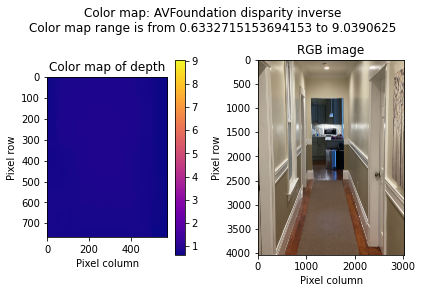

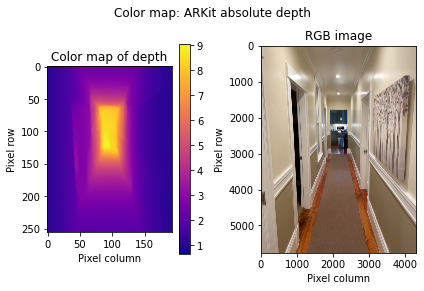

In [103]:
# Photo of indoor hallway
plot_and_print_comparison(
    'Photo3/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo3/AVFoundationDisparityInverted/photo.jpeg',
    'Photo3/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo3/ARKitAbsoluteDepth/photo.jpeg',
)

Printing disparity inverted:
[[1.1034483  1.1106291  1.117904   ... 0.54730093 0.54730093 0.54730093]
 [1.1034483  1.117904   1.117904   ... 0.54730093 0.54730093 0.54730093]
 [1.1034483  1.1106291  1.117904   ... 0.54730093 0.54730093 0.54730093]
 ...
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]]
Min value: 0.43170320987701416
Max value: 1.2315093278884888


Printing absolute depth map:
[[0.47973633 0.47631836 0.4753418  ... 1.2060547  1.1816406  1.1376953 ]
 [0.47436523 0.4633789  0.46948242 ... 1.1591797  1.1748047  1.1962891 ]
 [0.47045898 0.48168945 0.47485352 ... 1.1806641  1.1728516  1.1845703 ]
 ...
 [0.328125   0.328125   0.32885742 ... 0.97558594 0.9692383  0.9760742 ]
 [0.33032227 0.34277344 0.33398438 ... 0.96875    0.9785156  0.9716797 ]
 [0.3251953  0.33398438 0.3388672  ... 0.9692383  0.97753906 0.97

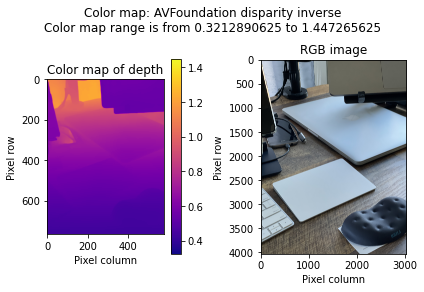

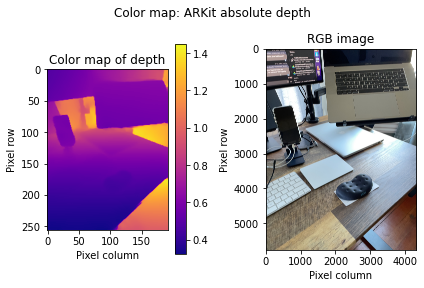

In [104]:
# Photo of desk
plot_and_print_comparison(
    'Photo4/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo4/AVFoundationDisparityInverted/photo.jpeg',
    'Photo4/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo4/ARKitAbsoluteDepth/photo.jpeg',
)

Printing disparity inverted:
[[1.022977  1.022977  1.022977  ... 1.2618607 1.2728403 1.2728403]
 [1.022977  1.022977  1.022977  ... 1.2728403 1.2728403 1.2728403]
 [1.022977  1.022977  1.022977  ... 1.2728403 1.2728403 1.2728403]
 ...
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]]
Min value: 0.39906468987464905
Max value: 1.3187379837036133


Printing absolute depth map:
[[1.3828125  1.3818359  1.4023438  ... 1.4882812  1.4882812  1.515625  ]
 [1.40625    1.4189453  1.4208984  ... 1.4794922  1.5        1.4677734 ]
 [1.3916016  1.4003906  1.4140625  ... 1.4931641  1.4892578  1.4667969 ]
 ...
 [0.26611328 0.26757812 0.2668457  ... 0.25732422 0.26098633 0.26513672]
 [0.26660156 0.28027344 0.2692871  ... 0.25854492 0.26489258 0.27001953]
 [0.26391602 0.2685547  0.27441406 ... 0.25317383 0.24047852 0.25952148]]
Min value: 0.240478515625
M

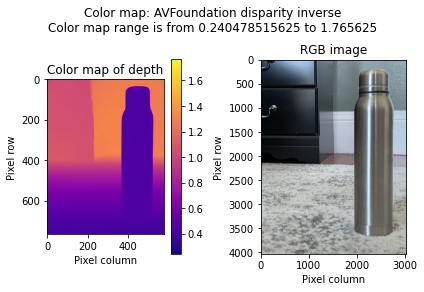

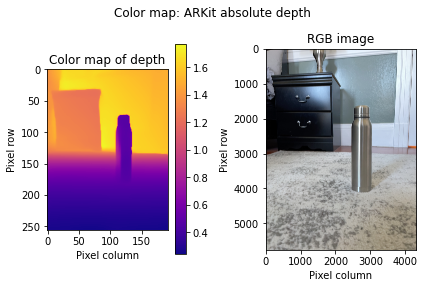

In [105]:
# Photo of bottle on bedroom floor
plot_and_print_comparison(
    'Photo5/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo5/AVFoundationDisparityInverted/photo.jpeg',
    'Photo5/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo5/ARKitAbsoluteDepth/photo.jpeg',
)

Printing disparity inverted:
[[1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1271327]
 [1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1271327]
 [1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1289967]
 ...
 [1.1358846 1.1333703 1.1333703 ... 1.1166848 1.1166848 1.1185144]
 [1.1358846 1.1358846 1.1333703 ... 1.1142546 1.1166848 1.1166848]
 [1.1358846 1.1358846 1.1358846 ... 1.1142546 1.1142546 1.1166848]]
Min value: 1.04543137550354
Max value: 1.901578426361084


Printing absolute depth map:
[[14.515625  14.6484375 14.5859375 ...  1.6035156  1.6103516  1.6337891]
 [14.390625  14.828125  14.5546875 ...  1.6054688  1.6259766  1.5810547]
 [14.53125   14.4296875 14.5625    ...  1.6152344  1.6171875  1.5908203]
 ...
 [ 1.3632812  1.3710938  1.3720703 ...  1.2919922  1.28125    1.2939453]
 [ 1.3603516  1.3886719  1.3662109 ...  1.2861328  1.2919922  1.2851562]
 [ 1.3457031  1.3623047  1.3613281 ...  1.2841797  1.2900391  1.2851562]]
Min value: 1.28125
Max value: 1

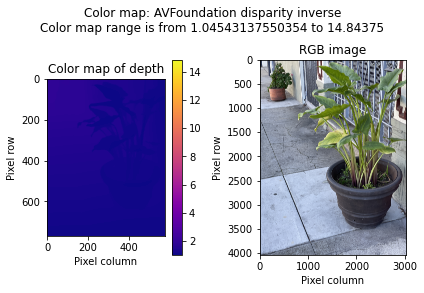

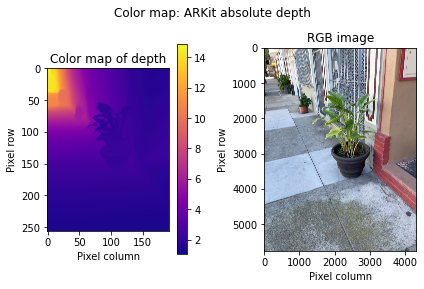

In [106]:
# Photo of plant on outdoor path
plot_and_print_comparison(
    'Photo6/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo6/AVFoundationDisparityInverted/photo.jpeg',
    'Photo6/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo6/ARKitAbsoluteDepth/photo.jpeg',
)

Printing disparity inverted:
[[0.44214162 0.44099915 0.4413793  ... 0.46886447 0.46886447 0.46886447]
 [0.4429066  0.44214162 0.44214162 ... 0.4684355  0.46886447 0.46886447]
 [0.44214162 0.44176015 0.44176015 ... 0.46800733 0.4684355  0.4684355 ]
 ...
 [0.45269674 0.45269674 0.45349866 ... 0.4718894  0.4718894  0.4718894 ]
 [0.45269674 0.45269674 0.45349866 ... 0.4718894  0.4718894  0.4718894 ]
 [0.45269674 0.45229682 0.4539007  ... 0.4718894  0.4718894  0.4718894 ]]
Min value: 0.4361158311367035
Max value: 0.4731977880001068


Printing absolute depth map:
[[0.75146484 0.74658203 0.7470703  ... 1.0263672  1.0185547  1.0488281 ]
 [0.7402344  0.76171875 0.75683594 ... 1.0273438  1.0439453  1.0087891 ]
 [0.74658203 0.74902344 0.7529297  ... 1.0302734  1.0322266  1.0185547 ]
 ...
 [0.8564453  0.8696289  0.8671875  ... 1.2324219  1.2246094  1.234375  ]
 [0.8696289  0.91748047 0.87841797 ... 1.2324219  1.234375   1.2324219 ]
 [0.89208984 0.8745117  0.8696289  ... 1.2333984  1.2412109  1.241

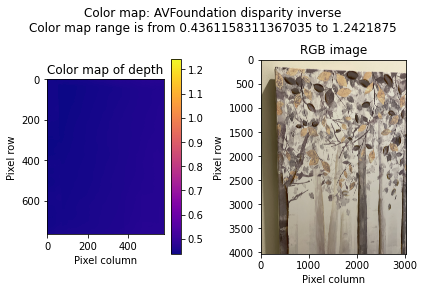

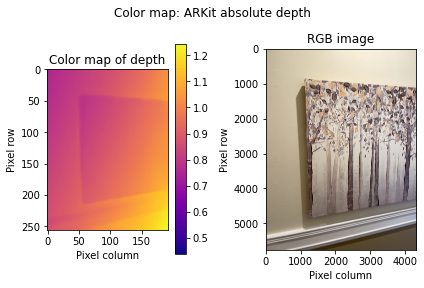

In [107]:
# Photo of painting on wall
plot_and_print_comparison(
    'Photo7/AVFoundationDisparityInverted/disparitymap_inverted.npy',
    'Photo7/AVFoundationDisparityInverted/photo.jpeg',
    'Photo7/ARKitAbsoluteDepth/absolutedepthmap.npy',
    'Photo7/ARKitAbsoluteDepth/photo.jpeg',
)